In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:

def lowess(x, y, f, it):
    n = len(x)
    r = int(np.ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = (1 - np.clip(np.abs((x[:, None] - x[None, :]) / h), 0, 1) ** 3) ** 3
    yest, delta = np.zeros(n), np.ones(n)
    
    for _ in range(it):
        for i in range(n):
            b = [np.sum(delta * w[:, i] * y), np.sum(delta * w[:, i] * y * x)]
            A = [[np.sum(delta * w[:, i]), np.sum(delta * w[:, i] * x)], [np.sum(delta * w[:, i] * x), np.sum(delta * w[:, i] * x * x)]]
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]
        
        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = (1 - np.clip(residuals / (6 * s), -1, 1) ** 2) ** 2
    
    return yest

In [3]:
n, f, it = 100, 0.25, 3
x = np.linspace(0, 2 * np.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
yest = lowess(x, y, f, it)

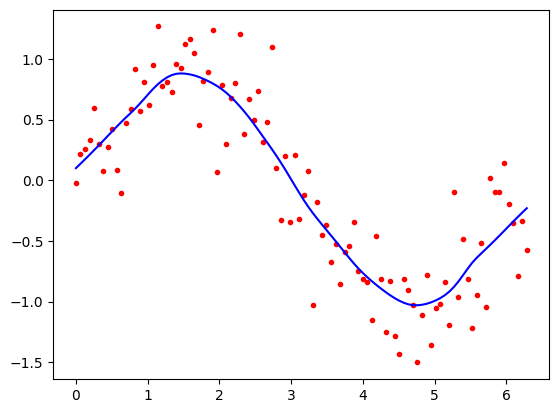

In [4]:
plt.plot(x, y, "r.", x, yest, "b-")
plt.show()